In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from FINDER_test_utils import *
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Plot synthetic test set performance of specific models

In [3]:
s2v_dqn_mean_approx_ratios = [1.0147, 1.0511, 1.0702]

In [4]:
folder_0 = 'tsp_min-n=15_max-n=20_num-graph=1000_type=random'
folder_1 = 'tsp_min-n=40_max-n=50_num-graph=1000_type=random'
folder_2 = 'tsp_min-n=50_max-n=100_num-graph=1000_type=random'
folder_names = [folder_0, folder_1, folder_2]

# result_dir = 'results/tsp_min-n=15_max-n=20_num-graph=1000_type=random/'
# data_dir = 'test_sets/tsp_min-n=15_max-n=20_num-graph=1000_type=random/'

In [5]:
def mean_approx_ratios_for_model(folder_names, model_name):
    mean_approx_ratios = []
    for folder in folder_names:
        result_dir = f'results/{folder}/'
        data_dir = f'test_sets/{folder}/'
        fnames, approx_ratios, test_lengths, solutions = get_data_from_result_files(data_dir, result_dir, model_name)
        mean_approx_ratios.append(np.mean(approx_ratios))
    return mean_approx_ratios

## Specifiy model paths and model names (to load results files)

In [33]:
model_path_0 =  'best_models/tsp_2d/nrange_15_20_len_1038117/'
model_file_0, model_base_path, tour_length = get_model_file(model_path_0)
model_name_0 = model_file_0.split('.')[0]

model_path_1 =  'best_models/tsp_2d/nrange_15_20_len_1011698/'
model_file_1, model_base_path, tour_length = get_model_file(model_path_1)
model_name_1 = model_file_1.split('.')[0]

model_path_2 =  'best_models/tsp_2d/nrange_15_20_len_1011194/'
model_file_2, model_base_path, tour_length = get_model_file(model_path_2)
model_name_2 = model_file_2.split('.')[0]

Best model file: nrange_15_20_iter_19500_len_1038117.ckpt
Best model file: nrange_15_20_iter_6600_len_1011698.ckpt
Best model file: nrange_15_20_iter_1500_len_1011194.ckpt


In [34]:
model_names = [model_name_0, model_name_1, model_name_2]

In [39]:
mean_approx_ratio_list = []
for model_name in model_names:
    model_means = mean_approx_ratios_for_model(folder_names, model_name)
    mean_approx_ratio_list.append(model_means)

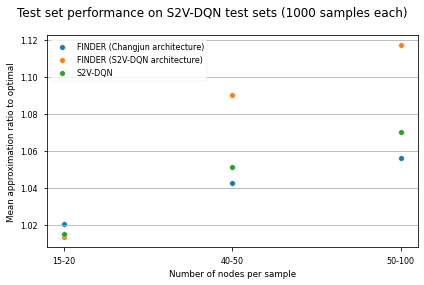

In [27]:
architecture_0 = 'FINDER (Changjun architecture)'
architecture_1 = 'FINDER (S2V-DQN architecture)'
mpl.style.use('seaborn-paper')

fig, axs = plt.subplots(1, 1, figsize=(6,4), sharex=True, sharey=True)
x = np.arange(0,len(mean_approx_ratio_list[0]))
sns.scatterplot(x=x,y=mean_approx_ratio_list[0], ax=axs, label=architecture_0)
sns.scatterplot(x=x,y=mean_approx_ratio_list[1], ax=axs, label=architecture_1)
sns.scatterplot(x=x,y=s2v_dqn_mean_approx_ratios, ax=axs, label='S2V-DQN')
axs.grid(True, axis='y')
# axs.axhline(y = 1.015, color = 'black', linestyle = '--', label='S2V-DQN (1.0147)')
axs.legend(loc='upper left')
axs.set_xticks(x)
axs.set_xticklabels(['15-20', '40-50', '50-100'])
axs.set_ylabel('Mean approximation ratio to optimal')
axs.set_xlabel('Number of nodes per sample')
plt.suptitle('Test set performance on S2V-DQN test sets (1000 samples each)')
plt.tight_layout()

plt.savefig(f'plots/testset_performance.png', dpi=400)

In [6]:
model_path_0 =  'best_models/tsp_2d/nrange_15_20_len_1011362/'
model_file_0, model_base_path, tour_length = get_model_file(model_path_0)
model_name_0 = model_file_0.split('.')[0]

model_path_2 =  'best_models/tsp_2d/nrange_15_20_len_1011194/'
model_file_2, model_base_path, tour_length = get_model_file(model_path_2)
model_name_2 = model_file_2.split('.')[0]

Best model file: nrange_15_20_iter_3900_len_1011362.ckpt
Best model file: nrange_15_20_iter_1500_len_1011194.ckpt


In [7]:
model_names = [model_name_0, model_name_2]
mean_approx_ratio_list = []
for model_name in model_names:
    model_means = mean_approx_ratios_for_model(folder_names, model_name)
    mean_approx_ratio_list.append(model_means)

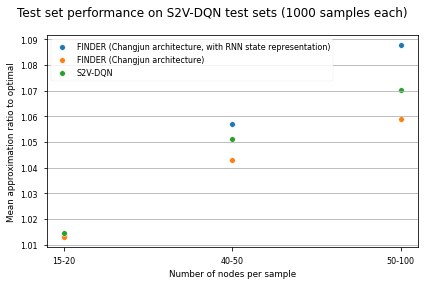

In [8]:
# architecture_0 = 'FINDER (Changjun architecture, selection through large validation set)'
architecture_0 = 'FINDER (Changjun architecture, with RNN state representation)'
architecture_1 = 'FINDER (Changjun architecture)'
mpl.style.use('seaborn-paper')

fig, axs = plt.subplots(1, 1, figsize=(6,4), sharex=True, sharey=True)
x = np.arange(0,len(mean_approx_ratio_list[0]))
sns.scatterplot(x=x,y=mean_approx_ratio_list[0], ax=axs, label=architecture_0)
sns.scatterplot(x=x,y=mean_approx_ratio_list[1], ax=axs, label=architecture_1)
sns.scatterplot(x=x,y=s2v_dqn_mean_approx_ratios, ax=axs, label='S2V-DQN')
axs.grid(True, axis='y')
# axs.axhline(y = 1.015, color = 'black', linestyle = '--', label='S2V-DQN (1.0147)')
axs.legend(loc='upper left')
axs.set_xticks(x)
axs.set_xticklabels(['15-20', '40-50', '50-100'])
axs.set_ylabel('Mean approximation ratio to optimal')
axs.set_xlabel('Number of nodes per sample')
plt.suptitle('Test set performance on S2V-DQN test sets (1000 samples each)')
plt.tight_layout()

plt.savefig(f'plots/testset_performance_changjun.png', dpi=400)